RABE REGIS Kylan  
MBA BIG DATA, Chief Data Officer  
31/01/21  
![Alt Text](https://dev.meilleurs-masters.com/logo_ecole/mbaesg-1549535834.png)
# Rapport projet tranverse partie SQL  

Les objetifs de cette partie sont les suivants :
* Manipuler et analyser de la Data sous SQL
* Programmer en SQL

Le contexte du projet est une société X a envoyé ces données client ainsi que les achats sur l'année N-2 (2016) et N-1 (2017).

Avant de commencer, il faut importer les différentes bibliothèques Python qui vont être utiliser dans ce rapport.

In [1]:
from matplotlib import pyplot as plt
import numpy as np

---
## Etude global

Nous commençons d'abord par l'étude global du projet.   
Pour cela, nous allons étudier trois points : la **répartion des clients**, l'évolution du **chiffre d'affaire global** et la répartion de l'**âge** en fonction du **sexe**.

### Répartition Adhérant / VIP
Commençons par la répartition des clients. Pour cela, on constitue un camembert suivant la répartition suivante :
* VIP : client étant VIP (VIP = 1)
* NEW_N2 : client ayant adhéré au cours de l'année N-2 (date début adhésion)
* NEW_N1 : client ayant adhéré au cours de l'année N-1 (date début adhésion)
* ADHÉRENT : client toujours en cours d'adhésion (date de fin d'adhésion > 2018/01/01)
* CHURNER : client ayant churner (date de fin d'adhésion < 2018/01/01)

*Note : le critère le plus au-dessus est prioritaire, exemple : un client étant VIP, et ayant adhéré sur
l'année N-1 sera compté comme étant VIP*

Pour cela, on utilise des requêtes SQL pour récupérer les différentes valeurs demandées. On commence par le critère le plus haut que l'on va retirer à chaque fois pour la requête suivante et ainsi de suite.

```sql
select count(vip) from client where vip = 1;
select count(datedebutadhesion) from client where extract(year from datedebutadhesion) = 2016 and vip = 0;
select count(datedebutadhesion) from client where extract(year from datedebutadhesion) = 2017 and vip = 0;
select count(date(datefinadhesion)) from client where date(datefinadhesion) > '20180101' and vip = 0
and extract(year from datedebutadhesion) not in (2016,2017);
select count(date(datefinadhesion)) from client where date(datefinadhesion) < '20180101' and vip = 0
and extract(year from datedebutadhesion) not in (2016,2017);
``` 

Les requêtes exécutées nous donne le tableau suivant :

| Nombre total de clients                                 | 845876 |
|---------------------------------------------------------|--------|
| Nombre de clients VIP                                   | 110451 |
| Nombre de client ayant adhéré au cours de l'année 2016  | 119923 |
| Nombre de clients ayant adhéré au cours de l'année 2017 | 130657 |
| Nombre de client toujours en cours d'adhésion           | 190565 |
| Nombre de CHURNER                                       | 294280 |

Une fois ces différentes valeurs récupérées il suffit d'utiliser un outil de data visualisation pour créer le camembert. Dans ce projet, on va utiliser python pour mettre en forme les données.

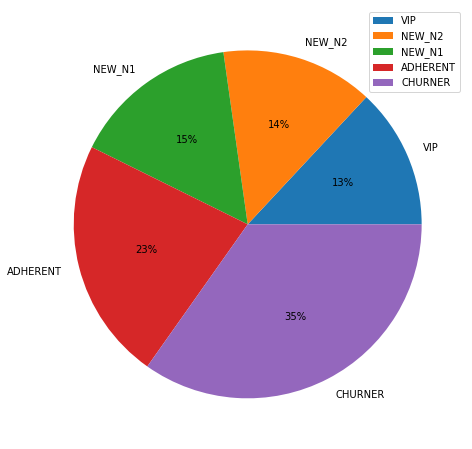

In [18]:
total = 845876;
nbVIP = 110451;
nbNEW_N2 = 119923;#client ayant adhéré au cours de l'année N-2 (date début adhésion)
nbNEW_N1 = 130657;#client ayant adhéré au cours de l'année N-1 (date début adhésion)
nbADHERENT = 190565;#client toujours en cours d'adhésion (date de fin d'adhésion > 2018/01/01)
nbCHURNER = 294280;#client ayant churner (date de fin d'adhésion < 2018/01/01)
plt.figure(figsize = (8, 8))
plt.pie([nbVIP, nbNEW_N2, nbNEW_N1, nbADHERENT, nbCHURNER], labels = ['VIP', 'NEW_N2', 'NEW_N1', 'ADHERENT', 'CHURNER'], autopct='%1.0f%%')
plt.legend()
plt.show()

### Comportement du CA GLOBAL par client N-2 vs N-1

On veut maintenant étudier l'évolution du chiffre d'affaire par client entre les années 2016 et 2017.  
Pour se faire, on constitue une boîte à moustache pour chaque année (N-2 et N-1) comparant le **CA TOTAL (TTC)** des clients. Pour trouver le CA, on va sommer les achats par client par années.

On écrit donc des requêtes SQL pour récupérer les CA par client et par année.

```sql
select idclient, sum(tic_totalttc) from entete_ticket where extract(year from tic_date) = 2016 group by idclient order by sum(tic_totalttc) asc;
select idclient, sum(tic_totalttc) from entete_ticket where extract(year from tic_date) = 2017 group by idclient order by sum(tic_totalttc) asc;
```
Voici un extrait des tableaux obtenus :

* En 2016

| IdClient | CA                  |
|----------|---------------------|
| 2640952  | -1187.88            |
| 1616535  | -787.06             |
| 2959864  | -500                |
| 1257352  | -325.84000000000003 |
| 2899293  | -291.4              |
| 2852744  | -269.95             |
| 2997876  | -269.63             |
| 2017745  | -252.92             |
| 59557    | -204.46             |
| 1837824  | -204.16             |

* En 2017

| IdClient | CA |
|----------|----|
| 253359   | 0  |
| 13842    | 0  |
| 261324   | 0  |
| 138897   | 0  |
| 7885     | 0  |
| 46049    | 0  |
| 179411   | 0  |
| 288853   | 0  |
| 264122   | 0  |
| 136692   | 0  |

On utilise ensuite Python pour mettre sous forme de boîte à moustaches les valeurs obtenues pour chaque année.

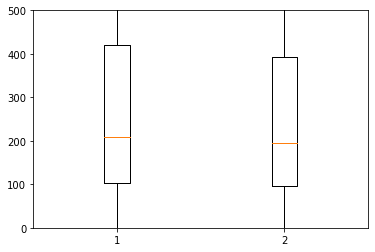

In [3]:
f = open("data-CA2016.csv",'r') 
content2016 = f.readlines() 
content20162 = content2016[1:len(content2016)]
data2016 = []
for ligne in content20162:   
    data2016.append(float(ligne.split(",")[1]))
f = open("data-CA2017.csv",'r') 
content2017 = f.readlines() 
content20172 = content2017[1:len(content2017)]
data2017 = []
for ligne in content20172:   
    data2017.append(float(ligne.split(",")[1]))
plt.boxplot([data2016, data2017])
plt.ylim(0, 500)
plt.show()

### Répartition par âge x sexe
Pour finir, on étudie la répartition âge en fonction du sexe.   
Cette fois, on constitue un graphique montrant la répartition par **âge x sexe** sur l'ensemble des clients.
Pour cela, à l'aide d'une requête SQL on récupère l'âge des clients en fonction de leur sexe.

```sql
select age, count(civilite) from client where civilite = 'Monsieur' group by age;
select age, count(civilite) from client where civilite = 'Madame' group by age;
```

Malheureusement en regardant les données on remarque qu'il y a des incohérences et notemmant des valeurs impossibles. On décide donc de restreindre la plage d'âge entre 0 et 100 (même si cela est encore très large notamment pour la valeur basse).

```sql
select age, count(civilite) from client where civilite = 'Monsieur' and age between 0 and 100 group by age;
select age, count(civilite) from client where civilite = 'Madame' and age between 0 and 100 group by age;
```

On exporte encore une fois les tableaux obtenues pour les utiliser sous Python.

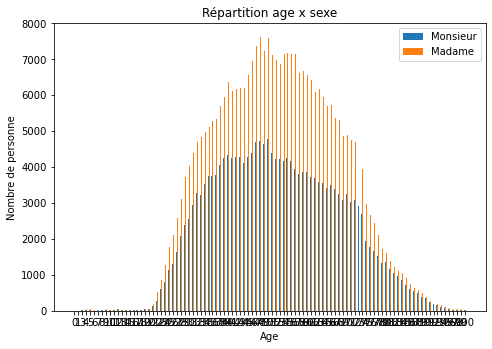

In [16]:
f = open("data-AgeHM.csv",'r') 
contentAgeH = f.readlines() 
contentAgeH2 = contentAgeH[1:len(contentAgeH)]
age = []
compteurH = []
for ligne in contentAgeH2:   
    age.append(int(ligne.split(",")[0]))
    compteurH.append(int((ligne.split(",")[1]).split('\n')[0]))
f = open("data-AgeFM.csv",'r') 
contentAgeF = f.readlines() 
contentAgeF2 = contentAgeF[1:len(contentAgeF)]
compteurF = []
for ligne in contentAgeF2:   
    compteurF.append(int((ligne.split(",")[1]).split('\n')[0]))

data = [compteurH,compteurF]
X = np.arange(len(age))
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
width = 0.25
ax.bar(X - width/2, data[0], width, label='Monsieur')
ax.bar(X + width/2, data[1], width, label='Madame')

plt.title("Répartition age x sexe")
plt.xlabel('Age')
plt.ylabel('Nombre de personne')
ax.set_xticks(X)
ax.set_xticklabels(age)
ax.legend()
plt.show()

La même répartition avec moins de valeurs pour une meilleure visibilité :

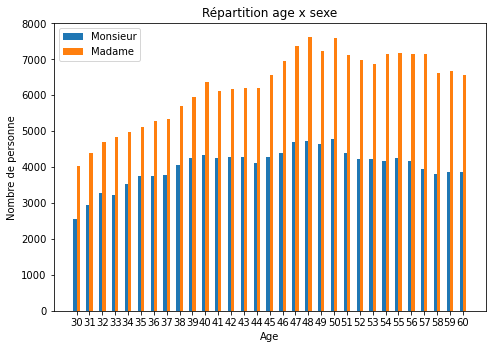

In [17]:
f = open("data-AgeHR.csv",'r') 
contentAgeH = f.readlines() 
contentAgeH2 = contentAgeH[1:len(contentAgeH)]
age = []
compteurH = []
for ligne in contentAgeH2:   
    age.append(int(ligne.split(",")[0]))
    compteurH.append(int((ligne.split(",")[1]).split('\n')[0]))
f = open("data-AgeFR.csv",'r') 
contentAgeF = f.readlines() 
contentAgeF2 = contentAgeF[1:len(contentAgeF)]
compteurF = []
for ligne in contentAgeF2:   
    compteurF.append(int((ligne.split(",")[1]).split('\n')[0]))

data = [compteurH,compteurF]
X = np.arange(len(age))
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
width = 0.25
ax.bar(X - width/2, data[0], width, label='Monsieur')
ax.bar(X + width/2, data[1], width, label='Madame')

plt.title("Répartition age x sexe")
plt.xlabel('Age')
plt.ylabel('Nombre de personne')
ax.set_xticks(X)
ax.set_xticklabels(age)
ax.legend()
plt.show()

## Etude par magasin

On veut maintenant faire une étude par rapport à chaque magasin

### Résultat par magasin (+1 ligne Total)

La table regroupant les informations pour chaque magasin n'existe pas, il faut donc la créer.  
On constitue donc un tableau reprenant les données suivantes :
* MAGASIN
* NOMBRE DE CLIENT RATTACHE AU MAGASIN (avec une color_bar en fonction de la quantité)
* Nombre de client actif sur N-2
* Nombre de client actif sur N-1
* % CLIENT N-2 vs N-1 (couleur police : vert si positif, rouge si négatif)
* TOTAL_TTC N-2
* TOTAL_TTC N-1
* Différence entre N-2 et N-1 (couleur police : vert si positif, rouge si négatif)
* indice évolution (icône de satisfaction : positif si %client actif évolue et total TTC aussi, négatif si diminution des 2 indicateurs, moyen seulement l'un des deux diminue)
Note : on effectuera un trie sur l'indice d'évolution (les positifs en haut, les négatifs en bas).

```sql
drop table IF EXISTS resultat_magasin;
create table resultat_magasin 
( 
	MAGASIN varchar(15) primary key,
	NB_CLIENT_MAGASIN integer,
	NB_CLIENT_ACTIF_N2 bigint,
	NB_CLIENT_ACTIF_N1 bigint,
	POURCENTAGE_CLIENT char(3),
	TOTAL_TTC_N2 varchar(15),
	TOTAL_TTC_N1 varchar(15),
	DIFF_N1_N2 char(3),
	IND_EVOLUTION char(3)
);

insert into resultat_magasin(MAGASIN, NB_CLIENT_MAGASIN,NB_CLIENT_ACTIF_N2,NB_CLIENT_ACTIF_N1) (select magasin from client group by magasin order by magasin, select count(client.idclient) from client group by client.magasin order by client.magasin,
																							   select count(date(datefinadhesion)) from client where date(datefinadhesion) > '20180101'
and extract(year from datedebutadhesion) = 2016 group by magasin order by magasin, select count(date(datefinadhesion)) from client where date(datefinadhesion) > '20180101'
and extract(year from datedebutadhesion) = 2017 group by magasin order by magasin;);

UPDATE resultat_magasin SET POURCENTAGE_CLIENT = (case 
				when (NB_CLIENT_ACTIF_N2/NB_CLIENT_MAGASIN)-(NB_CLIENT_ACTIF_N1/NB_CLIENT_MAGASIN) >= 0 then 'pos'
				else 'neg'
end);

UPDATE resultat_magasin SET TOTAL_TTC_N2 = sum(tic_totalttc) from client
join entete_ticket on client.idclient = entete_ticket.idclient
where extract(year from tic_date) = 2016 group by magasin;

UPDATE resultat_magasin SET TOTAL_TTC_N1 = sum(tic_totalttc) from client
join entete_ticket on client.idclient = entete_ticket.idclient
where extract(year from tic_date) = 2017 group by magasin;

UPDATE resultat_magasin SET DIFF_N1_N2 = (case 
				when TOTAL_TTC_N2 - TOTAL_TTC_N1 >= 0 then 'pos'
				else 'neg'
end);

UPDATE resultat_magasin SET IND_EVOLUTION = (case 
				when POURCENTAGE_CLIENT = 'pos' and DIFF_N1_N2 = 'pos' then 'pos'
				when POURCENTAGE_CLIENT = 'neg' and DIFF_N1_N2 = 'neg' then 'neg'
				else 'moy'
end);
```

### Distance CLIENT / MAGASIN

Le but étant de calculer la distance qui existe entre le magasin et le client. Les infos disponible pour le
moment sont :
- la ville du magasin
- le code insee du client

Il faut donc télécharger les données GPS des villes et code-insee pour pouvoir calculer la distance :
https://public.opendatasoft.com/explore/dataset/correspondance-code-insee-code-postal/
On crée une table qui reprendra les données GPS en ne gardant que le code INSEE, la ville et geo_point_2D (c'est-à-dire la longitude et la latitude).

```sql
drop table IF EXISTS donnees_GPS;
create table donnees_GPS 
( 
	CODEINSEE varchar(10),
	VILLE varchar(50),
	GEO_POINT_2D varchar(50)
);

COPY donnees_GPS  FROM 'C:\Users\Public\DATA_Projet_Transverse\correspondance-code-insee-code-postal.CSV' CSV HEADER delimiter ';' null '';

ALTER TABLE donnees_GPS ADD LATITUDE real;
UPDATE donnees_GPS SET LATITUDE = cast(split_part(geo_point_2d,',',1) as real);
ALTER TABLE donnees_GPS ADD LONGITUDE real;
UPDATE donnees_GPS SET LONGITUDE = cast(split_part(geo_point_2d,',',2) as real);
```

Une fois les données acquises, il faut lier les données GPS composé de la latitude et de la longitude au
client et au magasin. (constituer pour chaque client et chaque magasin 2 colonnes : latitude et
longitude).

* Client

```sql
ALTER TABLE client ADD LATITUDE real;
UPDATE client SET LATITUDE = donnees_GPS.latitude from donnees_gps where client.codeinsee = donnees_gps.codeinsee;
ALTER TABLE client ADD LONGITUDE real;
UPDATE client SET LONGITUDE = donnees_GPS.longitude from donnees_gps where client.codeinsee = donnees_gps.codeinsee;
```

* Magasin

```sql
ALTER TABLE ref_magasin ADD LATITUDE real;
UPDATE donnees_gps SET ville =  REPLACE(ville , '-', ' ');
UPDATE ref_magasin SET ville =  REPLACE(ville , 'ST', 'SAINT');
UPDATE ref_magasin SET ville =  REPLACE(ville , ' CEDEX', '');
UPDATE ref_magasin SET LATITUDE = donnees_GPS.latitude from donnees_gps where ref_magasin.ville = donnees_gps.ville;
ALTER TABLE ref_magasin ADD LONGITUDE real;
UPDATE ref_magasin SET LONGITUDE = donnees_GPS.longitude from donnees_gps where ref_magasin.ville = donnees_gps.ville;
```

On crée ensuite une fonction qui détermine la distance entre 2 points. La fonction doit prendre 4 variable en
compte : latitude1, longitude1, latitude2, longitude2

```sql
CREATE FUNCTION distance_entre_2_points(latitude1 real, longitude1 real, latitude2 real, longitude2 real)
returns real
as
'
	Declare d real;
	begin
		d = 6371*acos(sin(radians(latitude1))*sin(radians(latitude2))+cos(radians(latitude1))*cos(radians(latitude2))*cos(radians(longitude2-longitude1)));
		return d;
	end;
'
LANGUAGE PLPGSQL
```

Pour finir cette partie, on constitue une représentation (tableau ou graphique --> au choix) représentant le nombre de client par
distance : 0 à 5km, 5km à 10km, 10km à 20km, 20km à 50km, plus de 50km

```sql

```

## Etude par univers

On s'intéresse maintenant à chaque univers.

### ETUDE PAR UNIVERS

On cherche à comparer le chiffre d'affaire par univers entre les années 2016 et 2017.
Il faut ici constituer un histogramme N-2 / N-1 évolution du CA par univers.

On effectue donc une requête SQL pour récupérer les CA par univers pour chaque année.

```sql
select codeunivers, sum(tic_totalttc) from entete_ticket join lignes_ticket on entete_ticket.idticket = lignes_ticket.idticket
join ref_article on lignes_ticket.idarticle = codearticle where extract(year from tic_date) = 2016 group by codeunivers;

select codeunivers, sum(tic_totalttc) from entete_ticket join lignes_ticket on entete_ticket.idticket = lignes_ticket.idticket
join ref_article on lignes_ticket.idarticle = codearticle where extract(year from tic_date) = 2017 group by codeunivers;
```

On exporte ensuite ces deux tables pour pouvoir les insérer dans un histogramme.

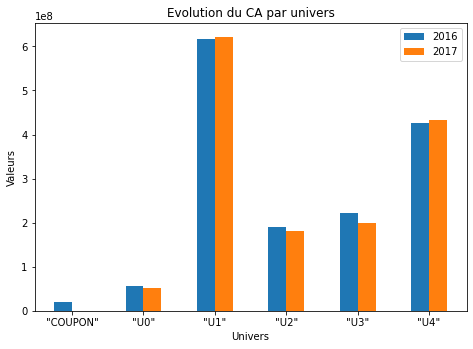

In [5]:
f = open("data-CAUnivers2016.csv",'r') 
contentUniv2016 = f.readlines() 
contentUniv20162 = contentUniv2016[1:len(contentUniv2016)]
univ2016 = []
CA2016 = []
for ligne in contentUniv20162:   
    univ2016.append(str(ligne.split(",")[0]))
    CA2016.append(float((ligne.split(",")[1]).split('\n')[0])) 
f = open("data-CAUnivers2017.csv",'r') 
contentUniv2017 = f.readlines() 
contentUniv20172 = contentUniv2017[1:len(contentUniv2017)]
CA2017 = [0.0]
for ligne in contentUniv20172:   
    CA2017.append(float((ligne.split(",")[1]).split('\n')[0]))

data = [CA2016,CA2017]
X = np.arange(len(univ2016))
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
width = 0.25
ax.bar(X - width/2, data[0], width, label='2016')
ax.bar(X + width/2, data[1], width, label='2017')

plt.title("Evolution du CA par univers")
plt.xlabel('Univers')
plt.ylabel('Valeurs')
ax.set_xticks(X)
ax.set_xticklabels(univ2016)
ax.legend()
plt.show()

### TOP PAR UNIVERS

Pour finir ce rapport, on se penche sur l'étude des familles par univers.
On veut donc afficher le top 5 des familles les plus rentable par univers (en fonction de la marge obtenu) sous forme de tableau.  
Pour cela, pour chaque univers on récupère les cinq familles en les classant dans l'ordre décroissant.  
*A noter que parfois il n'y a pas assez de famille dans l'univers*

#### Univers U0

```sql
select sum(margesortie), codefamille from ref_article
join lignes_ticket on lignes_ticket.idarticle = codearticle where ref_article.codeunivers = 'U0' group by codefamille order by sum(margesortie) desc limit 5;
```

| Somme Marge         | Code famille |
|---------------------|--------------|
| 5917722,980001758   | 160        |
| 10700,630000000043  | 230        |
| 1030,55             | 400        |
| -12475,900000000125 | 900        |

#### Univers U1

```sql
select sum(margesortie), codefamille from ref_article
join lignes_ticket on lignes_ticket.idarticle = codearticle where ref_article.codeunivers = 'U1' group by codefamille order by sum(margesortie) desc limit 5;
```

| Somme Marge        | Code famille |
|--------------------|--------------|
| 17461174,600014176 | 020        |
| 13094263,079999194 | 010        |
| 10245218,210001845 | 080        |
| 9370663,65999927   | 100        |
| 8230891,960004375  | 060        |

#### Univers U2

```sql
select sum(margesortie), codefamille from ref_article
join lignes_ticket on lignes_ticket.idarticle = codearticle where ref_article.codeunivers = 'U2' group by codefamille order by sum(margesortie) desc limit 5;
```

| Somme Marge       | Code famille |
|-------------------|--------------|
| 8140625,820002871 | 090        |
| 7742154,859999855 | 070        |
| 4425300,299999823 | 130        |
| 568901,3400000124 | 210        |
| 8230891,960004375 | 060        |

#### Univers U3

```sql
select sum(margesortie), codefamille from ref_article
join lignes_ticket on lignes_ticket.idarticle = codearticle where ref_article.codeunivers = 'U3' group by codefamille order by sum(margesortie) desc limit 5;
```

| Somme Marge        | Code famille |
|--------------------|--------------|
| 25890826,739999637 | 120        |
| 4300843,67999974   | 110        |

#### Univers U4

```sql
select sum(margesortie), codefamille from ref_article
join lignes_ticket on lignes_ticket.idarticle = codearticle where ref_article.codeunivers = 'U4' group by codefamille order by sum(margesortie) desc limit 5;
```

| Somme Marge        | Code famille |
|--------------------|--------------|
| 12876658,429994985 | 220        |
| 753928,0199999952  | 140        |
| 282383,9700000372  | 200        |